In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from fbprophet import Prophet # forecasting package developed at FB
from fbprophet.diagnostics import cross_validation, performance_metrics # Metrics to evaluate forecast
from fbprophet.plot import plot_cross_validation_metric # plot croosvalidation metric of prophet

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Goal: 
### Forecast the price of EACH construction material for up to six months and recommend when to buy it. Pay close attention to when are expected to increase sharply.

#### Note: For all materials but plywood, sharp price increases occur in the early months of every year. For plywood, sharp prices increases occur in the second half of the year.

### Steel: Buy from now until 2018-10
- Buy on Friday or weekend, if possible
- Price of steel is projected to start decreasing compare to previous years.
- The MAE for the model is between 20 and 33 cents or less than 0.2% (MAPE)

### Rebar: Buy now until 2018-08
- Price of rebar is projected to keep increasing
- Make sure rebar is bought on Fridays
- The MAE error is 0.2% (MAPE) or about 30 to 45 cents

### Glass: The price of glass seems to stay stable for relatively long periods of time. And it is projected to stay flat for the next six months.
- If possible buy on Weekends or Tues, Wed, Thurs
- The MAE is between 10 and 50 cents or less than 0.2% (MAPE)

### Concrete: Buy it between 2018-08 to 2018-09
- The price is expected to be similar for the next few months.
- Make sure to buy it on Fridays
- The MAE is between 20 to 70 cents or or less than 0.3% (MAPE)

### Plywood: For the best deal, buy between 2019-09 and 2019-10.
- The price of plywood is expected to keep increasing
- To get the best deal buy on Friday or Saturday.
- The MAE is between 25 and 35 cents or less than 0.2% (MAPE)

In [2]:
data=pd.read_csv('construction_material_prices_2008_2018.csv', parse_dates=['Unnamed: 0'], dayfirst=True)
data.tail(50)

,Unnamed: 0,price_steel,price_rebar,price_glass,price_concrete,price_plywood
2895,2018-04-10,NaN,38.00,NaN,NaN,10.833333
2896,2018-04-11,NaN,34.00,NaN,NaN,10.833333
2897,2018-04-12,NaN,31.50,NaN,NaN,10.625000
2898,2018-04-13,NaN,31.00,NaN,NaN,10.625000
2899,2018-04-16,NaN,31.00,NaN,NaN,11.500000
2900,2018-04-17,NaN,17.50,NaN,NaN,11.166667
2901,2018-04-18,12.250000,17.50,NaN,NaN,11.500000
2902,2018-04-19,12.250000,16.50,NaN,NaN,11.500000
2903,2018-04-20,12.250000,22.25,NaN,NaN,12.666667
2904,2018-04-23,13.750000,20.50,NaN,NaN,14.666667


#### Data is full of NaN's I'll remove them before modeling.

In [3]:
# how many null values?
data.isnull().sum()

Unnamed: 0           0
price_steel        636
price_rebar       1296
price_glass       1473
price_concrete    1498
price_plywood      272
dtype: int64

In [4]:
# What are the dtypes and # of valid instances?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2945 entries, 0 to 2944
Data columns (total 6 columns):
Unnamed: 0        2945 non-null datetime64[ns]
price_steel       2309 non-null float64
price_rebar       1649 non-null float64
price_glass       1472 non-null float64
price_concrete    1447 non-null float64
price_plywood     2673 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 138.1 KB


In [5]:
# Rename first column as date
data.rename(columns={'Unnamed: 0':'date'}, inplace=True)

In [6]:
data.columns

Index(['date', 'price_steel', 'price_rebar', 'price_glass', 'price_concrete',
       'price_plywood'],
      dtype='object')

In [7]:
# Lets check some basic describe stats
data.describe()

,price_steel,price_rebar,price_glass,price_concrete,price_plywood
count,2309.000000,1649.000000,1472.000000,1447.000000,2673.000000
mean,12.611319,18.306339,29.997962,26.000636,12.775067
std,6.038862,8.587938,6.524622,7.314764,3.931698
min,3.062500,3.000000,16.000000,10.416667,5.000000
25%,8.500000,12.071429,25.000000,20.559028,10.125000
50%,10.500000,16.500000,29.000000,25.043478,12.125000
75%,14.833333,22.500000,35.000000,30.000000,14.333333
max,41.000000,55.000000,48.000000,50.000000,34.000000


#### Instances values seem reasonable. There are no crazy outliers to eliminate.

#### There are plenty of missing values in this dataset. These missing data doesn't seem to be at random, so I don't think I should imputate the values since that may cause bias of the data. Instead, I am going to create a dataframe for each material and treat each material separately.

#### First, lets plot the features against date.

In [8]:
features = data.drop('date', axis=1)
date = data.date

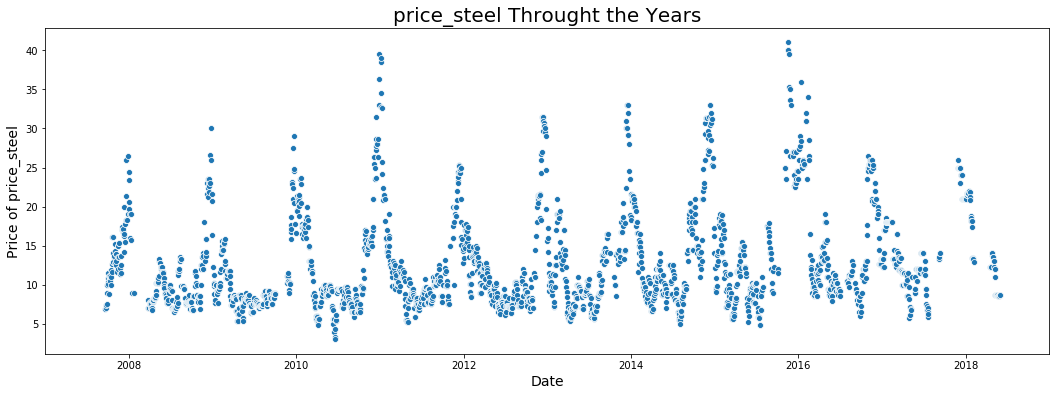

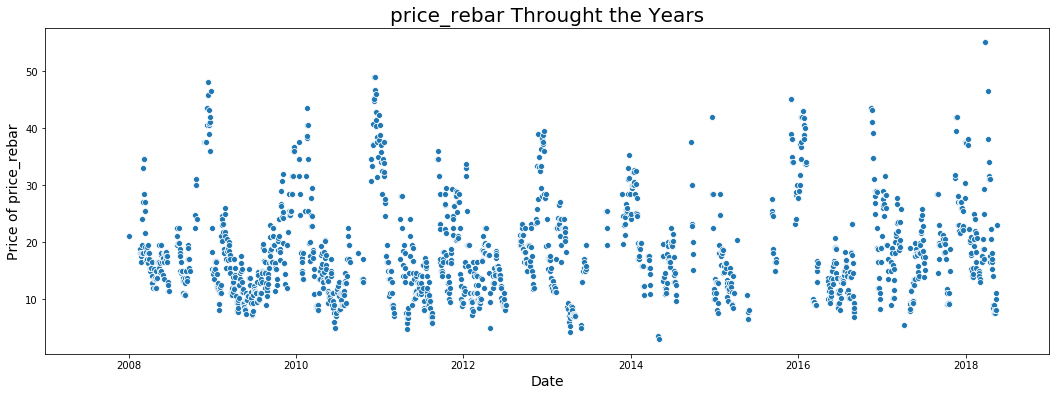

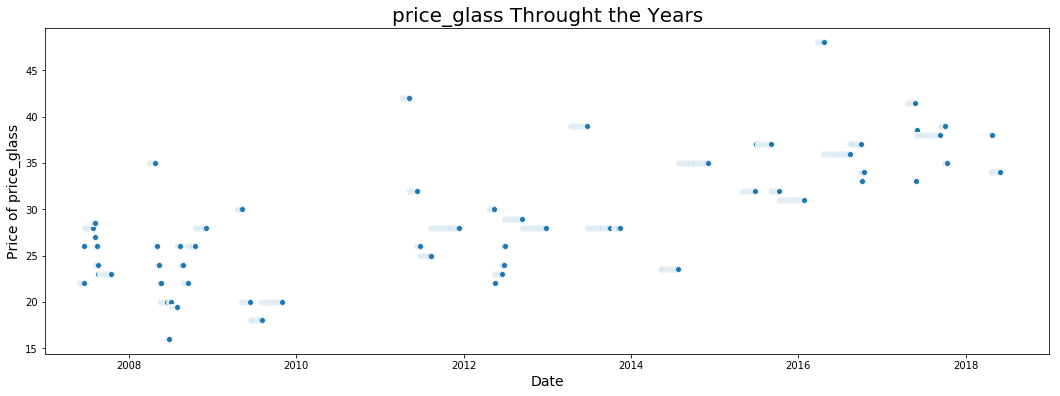

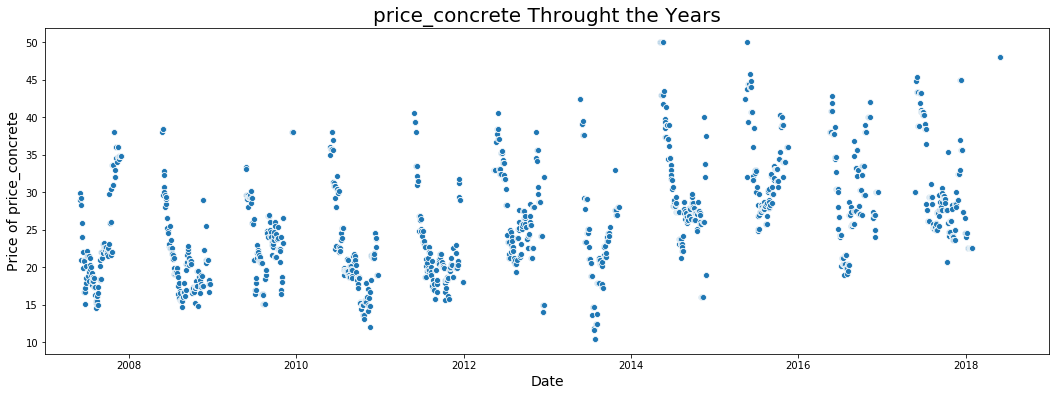

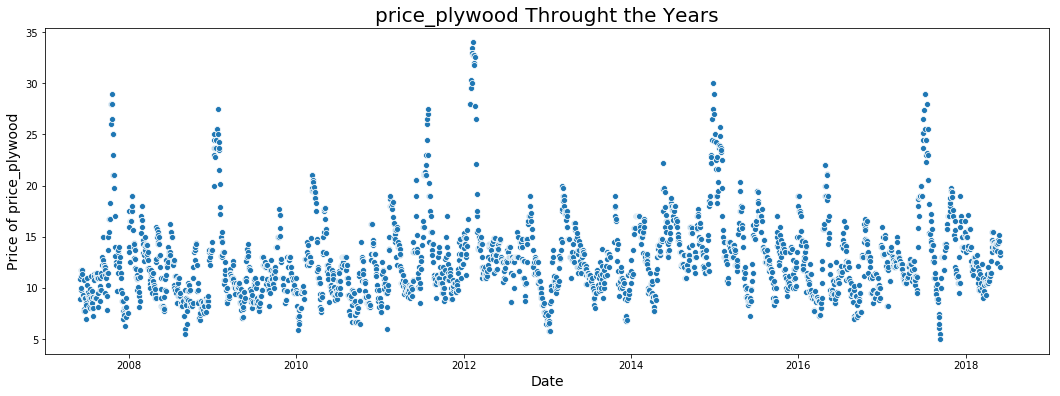

In [9]:
for col in features.columns:
    p=plt.figure(figsize=(18,6))
    
    p = sns.scatterplot(x=date, y=features[col], marker='o')
    
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price of '+col, fontsize=14)
    plt.title(col+' Throught the Years', fontsize=20)
    p.set_xlim(pd.Timestamp('2007-01-01'), pd.Timestamp('2019-01-01'))
    
    plt.show(p)

#### Data shows some seasonality. Although in the case of glass, data is very scatter. Because of the potential seasonality prophet may be a good package to forecast pricing.
#### price_glass features shows very little data. That is not representative of the number of not null datapoints. However, the reason for this plot is not sparse data, but it is cause by a lack of variability of values for a relatively long period of time.

In [10]:
# Lets create a df for each material with date
data_steel = data[['date', 'price_steel']]
data_rebar = data[['date', 'price_rebar']]
data_glass = data[['date', 'price_glass']]
data_concrete = data[['date', 'price_concrete']]
data_plywood = data[['date', 'price_plywood']]

In [11]:
print(data_steel.shape)
print(data_rebar.shape)
print(data_glass.shape)
print(data_concrete.shape)
print(data_plywood.shape)

(2945, 2)
(2945, 2)
(2945, 2)
(2945, 2)
(2945, 2)


### Data preprocesing:
#### For modeling I will first log transform the data. This helps convert non stationary data into stationary
### To plot the data:
#### I will inverse log transform the data so that the plots show meaningful numbers
#### I will also plot inverse log transform metrics so that they show meaningful values.

In [12]:
data_steel.columns=['ds','y']
data_steel['y_orig'] = data_steel.y #keeping original data in df
data_steel.y = np.log(data_steel.y) #log transform data
data_steel = data_steel.dropna()
data_steel.tail()

,ds,y,y_orig
2927,2018-05-24,2.140066,8.50
2928,2018-05-25,2.140066,8.50
2929,2018-05-29,2.169054,8.75
2930,2018-05-30,2.169054,8.75
2931,2018-05-31,2.169054,8.75


In [13]:
steel_model = Prophet() # Make profet model
steel_model.fit(data_steel) #Fit the model

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
# Make a future df. We are interested in forecasting 6 months = 182.5 days
# This will create a df with size months worth of dates.
steel_future = steel_model.make_future_dataframe(periods=183)
steel_future.tail()

,ds
2487,2018-11-26
2488,2018-11-27
2489,2018-11-28
2490,2018-11-29
2491,2018-11-30


In [16]:
# Lets predict values for those six months
steel_forecast = steel_model.predict(steel_future)
steel_forecast_orig = steel_forecast #create a copy  of prediction df

# inverse log transform the predictions
steel_forecast_orig[['yhat', 'yhat_lower', 'yhat_upper']] = np.exp(steel_forecast_orig[['yhat', 'yhat_lower', 'yhat_upper']])
steel_forecast_orig[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2487,2018-11-26,21.269326,15.282261,29.322413
2488,2018-11-27,21.639651,15.673366,29.665456
2489,2018-11-28,21.706190,15.524888,30.782437
2490,2018-11-29,21.658695,15.661231,29.323723
2491,2018-11-30,21.567473,16.013648,29.977173


Text(0.5, 1.0, 'Forecast of Steel Price')

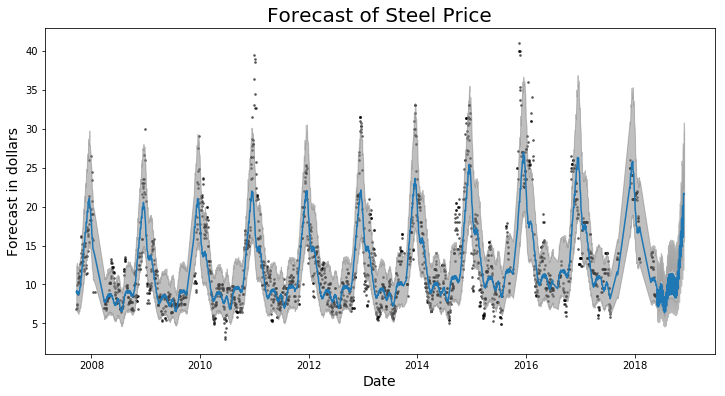

In [17]:
# plot predictions and historic data
plt.figure(figsize=(12,6))
plt.plot(steel_forecast_orig.ds, steel_forecast_orig.yhat)
plt.scatter(data_steel.ds, data_steel.y_orig, color='k', alpha=0.5, s=3)

# plotting upper/lower bounds
plt.fill_between(steel_forecast_orig.ds, steel_forecast_orig.yhat_lower,steel_forecast_orig.yhat_upper,
                 color='gray', alpha=0.5)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Forecast in dollars', fontsize=14)
plt.title('Forecast of Steel Price', fontsize=20)

(736695.0, 737119.0)

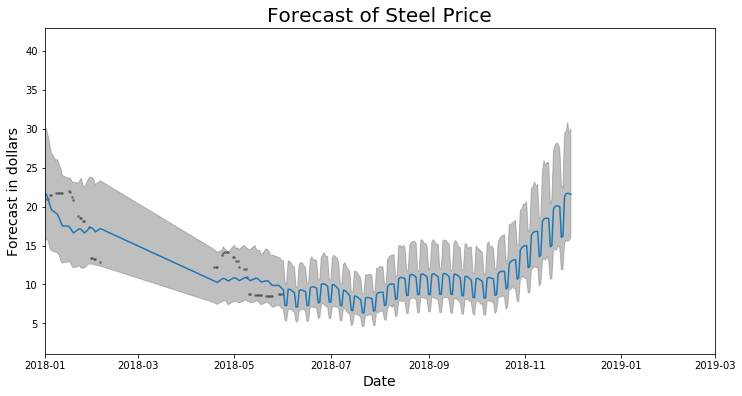

In [18]:
# Lets do a closeup in prediction to see distribution of forescated value and use this to make recommendations.
plt.figure(figsize=(12,6))
plt.plot(steel_forecast_orig.ds, steel_forecast_orig.yhat)
plt.scatter(data_steel.ds, data_steel.y_orig, color='k', alpha=0.5, s=3)

# plotting upper/lower bounds
plt.fill_between(steel_forecast_orig.ds, steel_forecast_orig.yhat_lower,steel_forecast_orig.yhat_upper,
                 color='gray', alpha=0.5)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Forecast in dollars', fontsize=14)
plt.title('Forecast of Steel Price', fontsize=20)
plt.xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2019-03-01'))

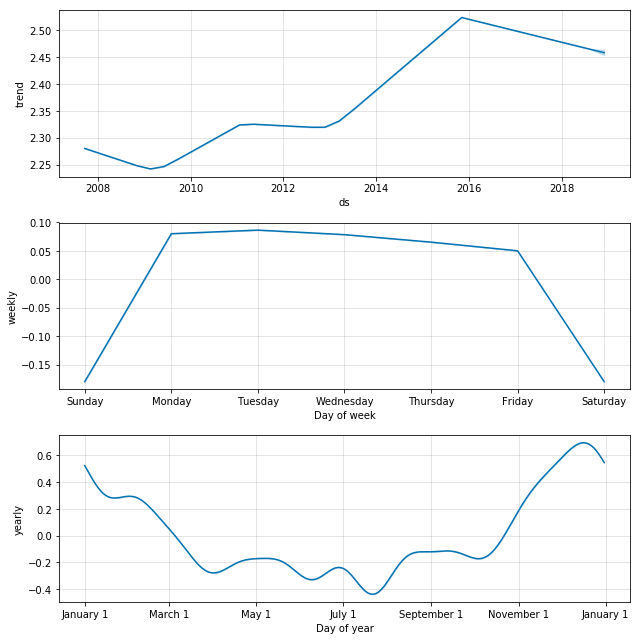

In [19]:
steel_components_plot=steel_model.plot_components(steel_forecast)

In [20]:
# Lets crossvalidate our predictions.
# This will use 3 times horizon (1.5 years) as training data
steel_cv = cross_validation(steel_model, horizon='183 days')
steel_metrics = performance_metrics(steel_cv)
steel_metrics.head(5)

INFO:fbprophet:Making 35 forecasts with cutoffs between 2009-05-24 00:00:00 and 2017-11-29 00:00:00


,horizon,mse,rmse,mae,mape,coverage
448,17 days,0.072632,0.269503,0.218939,0.089990,0.634211
1652,17 days,0.073062,0.270300,0.219742,0.090205,0.631579
11,17 days,0.071999,0.268326,0.218597,0.089606,0.631579
3429,17 days,0.072594,0.269433,0.219813,0.090015,0.628947
2842,17 days,0.072565,0.269379,0.219572,0.089923,0.628947


(0.1, 0.4)

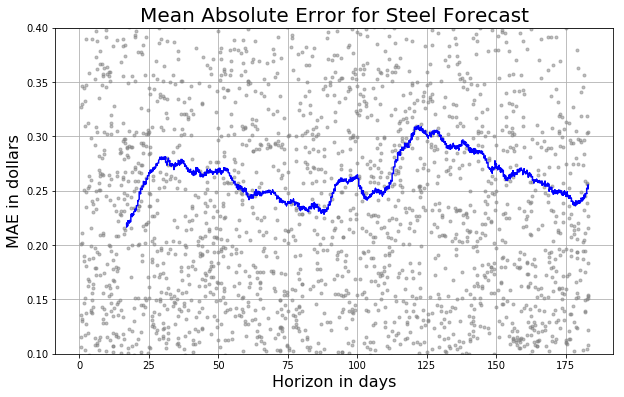

In [26]:
plot_cross_validation_metric(steel_cv, metric='mae')
plt.xlabel('Horizon in days', fontsize=16)
plt.ylabel('MAE in dollars', fontsize=16)
plt.title('Mean Absolute Error for Steel Forecast', fontsize=20)
plt.ylim(0.1,0.4)

#### Peformance of the forecast for steel is quite impressive. The error is between 20 and 33 cents or less than 0.2%

#### I will use the same procesure as before to forescast the rest of the materials.

In [27]:
data_rebar.columns=['ds','y']
data_rebar['y_orig'] = data_rebar['y']
data_rebar['y'] = np.log(data_rebar['y'])
data_rebar = data_rebar.dropna()
data_rebar.head()

,ds,y,y_orig
258,2008-01-03,3.044522,21.00
290,2008-02-20,2.931194,18.75
291,2008-02-21,2.890372,18.00
292,2008-02-22,2.862201,17.50
293,2008-02-25,2.890372,18.00


In [28]:
rebar_model = Prophet()
rebar_model.fit(data_rebar)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
rebar_future = rebar_model.make_future_dataframe(periods=183)
rebar_future.tail()

,ds
1827,2018-11-13
1828,2018-11-14
1829,2018-11-15
1830,2018-11-16
1831,2018-11-17


In [30]:
rebar_forecast = rebar_model.predict(rebar_future)
rebar_forecast_orig = rebar_forecast

# inverse log transform prediction
rebar_forecast_orig[['yhat', 'yhat_lower', 'yhat_upper']] = np.exp(rebar_forecast_orig[['yhat', 'yhat_lower', 'yhat_upper']])
steel_forecast_orig[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2487,2018-11-26,21.269326,15.282261,29.322413
2488,2018-11-27,21.639651,15.673366,29.665456
2489,2018-11-28,21.706190,15.524888,30.782437
2490,2018-11-29,21.658695,15.661231,29.323723
2491,2018-11-30,21.567473,16.013648,29.977173


Text(0.5, 1.0, 'Forecast of Rebar Price')

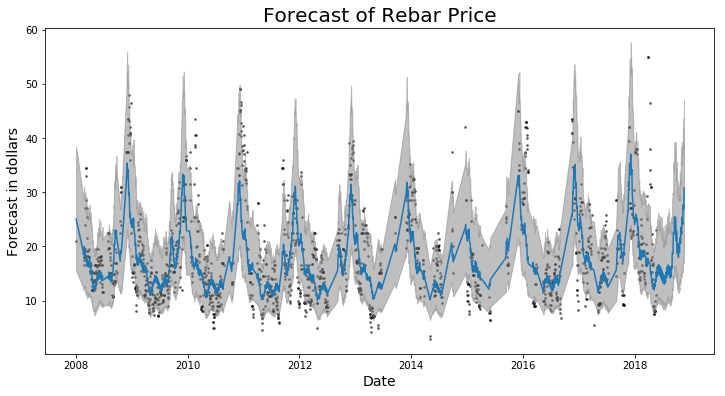

In [31]:
# plot prediction, upper/lower bounds and historic data
plt.figure(figsize=(12,6))
plt.plot(rebar_forecast_orig.ds, rebar_forecast_orig.yhat)
plt.scatter(data_rebar.ds, data_rebar.y_orig, color='k', alpha=0.5, s=3)

# plotting upper/lower bounds
plt.fill_between(rebar_forecast_orig.ds, rebar_forecast_orig.yhat_lower,rebar_forecast_orig.yhat_upper,
                 color='gray', alpha=0.5)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Forecast in dollars', fontsize=14)
plt.title('Forecast of Rebar Price', fontsize=20)

(736695.0, 737119.0)

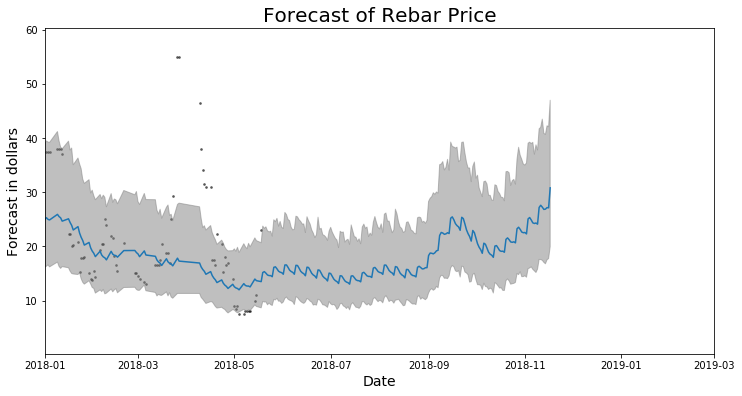

In [32]:
plt.figure(figsize=(12,6))
plt.plot(rebar_forecast_orig.ds, rebar_forecast_orig.yhat)
plt.scatter(data_rebar.ds, data_rebar.y_orig, color='k', alpha=0.5, s=3)

# plotting upper/lower bounds
plt.fill_between(rebar_forecast_orig.ds, rebar_forecast_orig.yhat_lower,rebar_forecast_orig.yhat_upper,
                 color='gray', alpha=0.5)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Forecast in dollars', fontsize=14)
plt.title('Forecast of Rebar Price', fontsize=20)
plt.xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2019-03-01'))

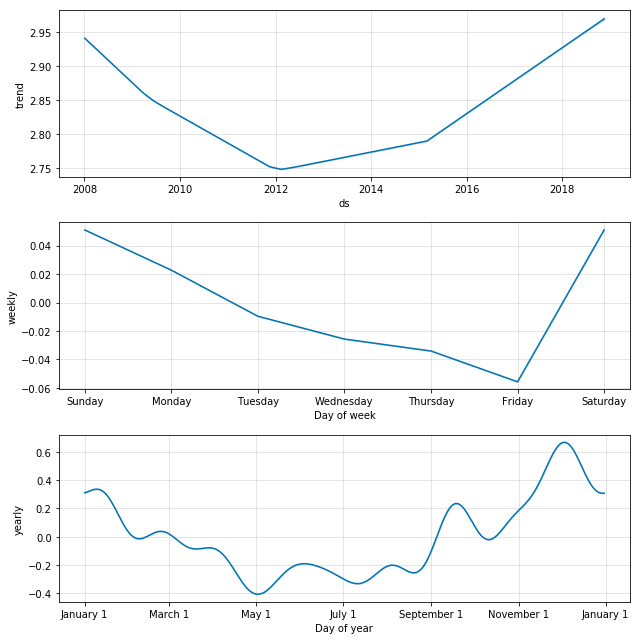

In [33]:
rebar_components_plot=rebar_model.plot_components(rebar_forecast)

In [34]:
rebar_cv = cross_validation(rebar_model, horizon='183 days')
rebar_metrics = performance_metrics(rebar_cv)
rebar_metrics.head(5)

INFO:fbprophet:Making 34 forecasts with cutoffs between 2009-08-10 12:00:00 and 2017-11-16 00:00:00


,horizon,mse,rmse,mae,mape,coverage
1775,18 days 12:00:00,0.172842,0.415743,0.344336,0.129594,0.599222
976,18 days 12:00:00,0.172189,0.414956,0.343275,0.129252,0.603113
1615,19 days 00:00:00,0.171566,0.414205,0.342078,0.128903,0.607004
457,19 days 00:00:00,0.172454,0.415275,0.343482,0.129277,0.603113
651,19 days 00:00:00,0.171977,0.414701,0.342811,0.129072,0.607004


(0.3, 0.5)

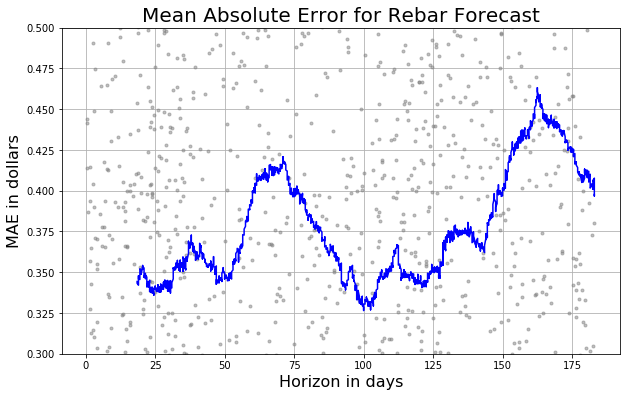

In [38]:
plot_cross_validation_metric(rebar_cv, metric='mae')
plt.xlabel('Horizon in days', fontsize=16)
plt.ylabel('MAE in dollars', fontsize=16)
plt.title('Mean Absolute Error for Rebar Forecast', fontsize=20)
plt.ylim(0.3, 0.5)

#### Performance for rebar forecasting is quite good. The error is 0.2% or about 30 to 45 cents

In [39]:
data_glass.columns=['ds','y']
data_glass['y_orig'] = data_glass['y']
data_glass['y'] = np.log(data_glass['y'])
data_glass = data_glass.dropna()

In [40]:
data_glass.head()

,ds,y,y_orig
105,2007-06-01,3.091042,22.0
106,2007-06-04,3.091042,22.0
107,2007-06-05,3.091042,22.0
108,2007-06-06,3.091042,22.0
109,2007-06-07,3.091042,22.0


In [41]:
glass_model = Prophet()
glass_model.fit(data_glass)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
glass_future = glass_model.make_future_dataframe(periods=183)
glass_future.tail()

,ds
1650,2018-11-26
1651,2018-11-27
1652,2018-11-28
1653,2018-11-29
1654,2018-11-30


In [43]:
glass_forecast = glass_model.predict(glass_future)
glass_forecast_orig = glass_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# inverse log transform prediction
glass_forecast_orig[['yhat', 'yhat_lower', 'yhat_upper']] = np.exp(glass_forecast_orig[['yhat', 'yhat_lower', 'yhat_upper']])
glass_forecast_orig[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1650,2018-11-26,38.961430,33.865686,44.830139
1651,2018-11-27,38.651484,33.885470,44.374974
1652,2018-11-28,38.577521,33.735445,44.848753
1653,2018-11-29,38.452992,33.510568,44.517080
1654,2018-11-30,38.456943,33.247849,44.351966


Text(0.5, 1.0, 'Forecast of Glass Price')

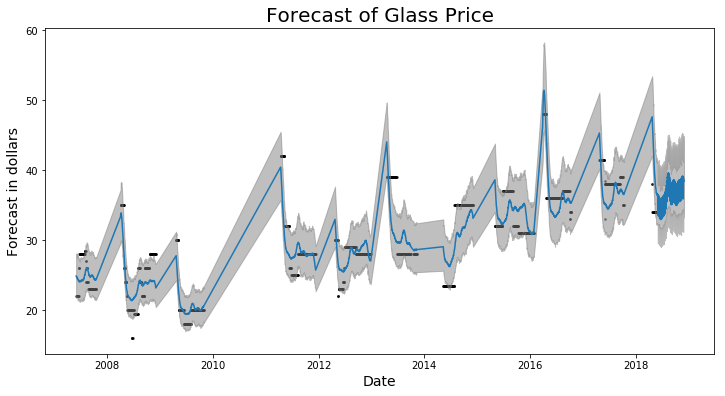

In [44]:
# plot prediction, upper/lower bounds and historic data
plt.figure(figsize=(12,6))
plt.plot(glass_forecast_orig.ds, glass_forecast_orig.yhat)
plt.scatter(data_glass.ds, data_glass.y_orig, color='k', alpha=0.5, s=3)

# plotting upper/lower bounds
plt.fill_between(glass_forecast_orig.ds, glass_forecast_orig.yhat_lower,glass_forecast_orig.yhat_upper,
                 color='gray', alpha=0.5)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Forecast in dollars', fontsize=14)
plt.title('Forecast of Glass Price', fontsize=20)

(736695.0, 737119.0)

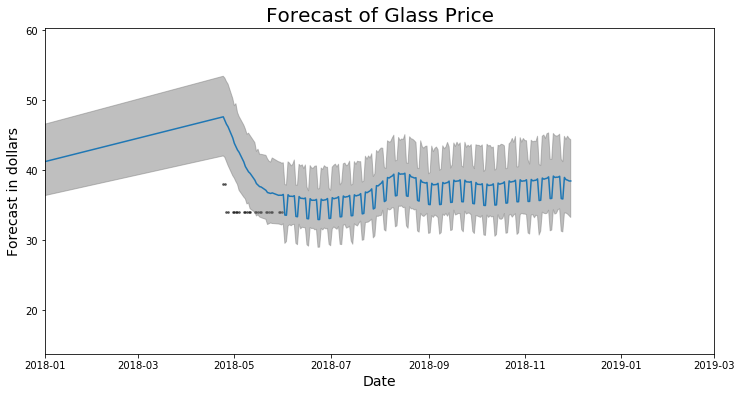

In [45]:
# plot prediction, upper/lower bounds and historic data
plt.figure(figsize=(12,6))
plt.plot(glass_forecast_orig.ds, glass_forecast_orig.yhat)
plt.scatter(data_glass.ds, data_glass.y_orig, color='k', alpha=0.5, s=3)

# plotting upper/lower bounds
plt.fill_between(glass_forecast_orig.ds, glass_forecast_orig.yhat_lower,glass_forecast_orig.yhat_upper,
                 color='gray', alpha=0.5)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Forecast in dollars', fontsize=14)
plt.title('Forecast of Glass Price', fontsize=20)
plt.xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2019-03-01'))

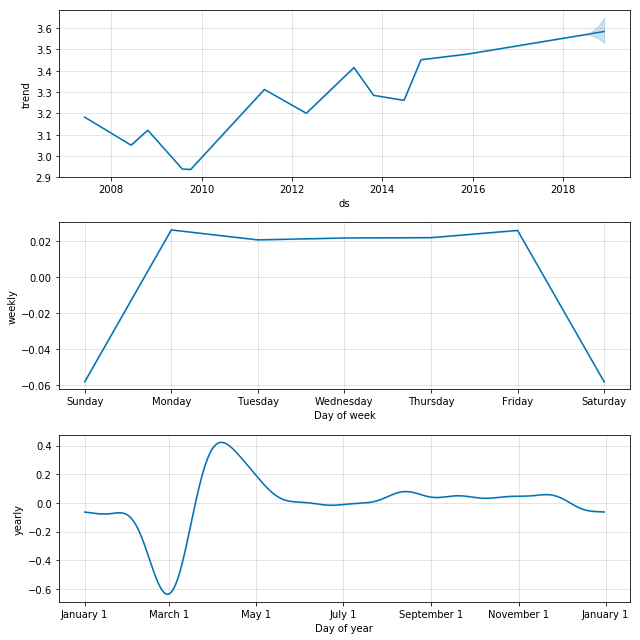

In [46]:
glass_components_plot=glass_model.plot_components(glass_forecast)

In [47]:
glass_cv = cross_validation(glass_model, horizon='183 days')
glass_metrics = performance_metrics(glass_cv)
glass_metrics.head(5)

INFO:fbprophet:Making 31 forecasts with cutoffs between 2009-01-28 12:00:00 and 2017-11-29 00:00:00


,horizon,mse,rmse,mae,mape,coverage
1752,19 days,0.018201,0.134910,0.112155,0.032551,0.517241
81,19 days,0.018148,0.134715,0.111867,0.032473,0.521552
650,19 days,0.018235,0.135037,0.112345,0.032632,0.517241
330,19 days,0.018262,0.135136,0.112619,0.032717,0.517241
858,19 days,0.018251,0.135097,0.112482,0.032681,0.517241


(0, 0.5)

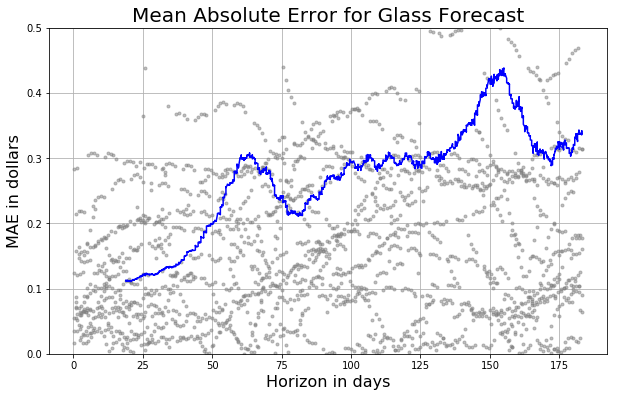

In [55]:
plot_cross_validation_metric(glass_cv, metric='mae')
plt.xlabel('Horizon in days', fontsize=16)
plt.ylabel('MAE in dollars', fontsize=16)
plt.title('Mean Absolute Error for Glass Forecast', fontsize=20)
plt.ylim(0,0.5)

#### Glass forecasting shoes good performance. The error is between 10 and 50 cents or less than 0.2%

In [56]:
data_concrete.columns=['ds','y']
data_concrete['y_orig'] = data_concrete['y']
data_concrete['y'] = np.log(data_concrete['y'])
data_concrete = data_concrete.dropna()
data_concrete.head()

,ds,y,y_orig
105,2007-06-01,3.368445,29.033333
106,2007-06-04,3.397487,29.888889
107,2007-06-05,3.374169,29.200000
108,2007-06-06,3.374169,29.200000
109,2007-06-07,3.345108,28.363636


In [57]:
concrete_model = Prophet()
concrete_model.fit(data_concrete)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [58]:
concrete_future = concrete_model.make_future_dataframe(periods=183)
concrete_future.tail()

,ds
1625,2018-11-26
1626,2018-11-27
1627,2018-11-28
1628,2018-11-29
1629,2018-11-30


In [59]:
concrete_forecast = concrete_model.predict(concrete_future)
concrete_forecast_orig = concrete_forecast

# inverse log transform prediction
concrete_forecast_orig[['yhat', 'yhat_lower', 'yhat_upper']] = np.exp(concrete_forecast_orig[['yhat', 'yhat_lower', 'yhat_upper']])
concrete_forecast_orig[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1625,2018-11-26,31.475918,25.118148,38.867842
1626,2018-11-27,31.519174,25.454856,39.006469
1627,2018-11-28,31.332383,25.115101,39.480128
1628,2018-11-29,31.228997,25.176805,38.971406
1629,2018-11-30,31.045578,24.935259,38.585972


Text(0.5, 1.0, 'Forecast of Concrete Price')

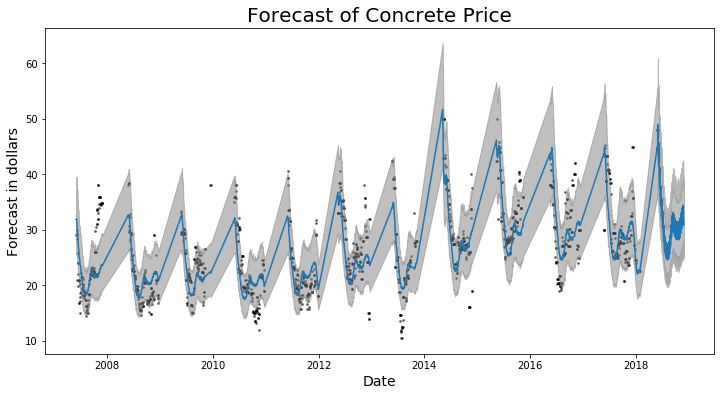

In [60]:
# plot prediction, upper/lower bounds and historic data
plt.figure(figsize=(12,6))
plt.plot(concrete_forecast_orig.ds, concrete_forecast_orig.yhat)
plt.scatter(data_concrete.ds, data_concrete.y_orig, color='k', alpha=0.5, s=3)

# plotting upper/lower bounds
plt.fill_between(concrete_forecast_orig.ds, concrete_forecast_orig.yhat_lower, concrete_forecast_orig.yhat_upper,
                 color='gray', alpha=0.5)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Forecast in dollars', fontsize=14)
plt.title('Forecast of Concrete Price', fontsize=20)

(736695.0, 737119.0)

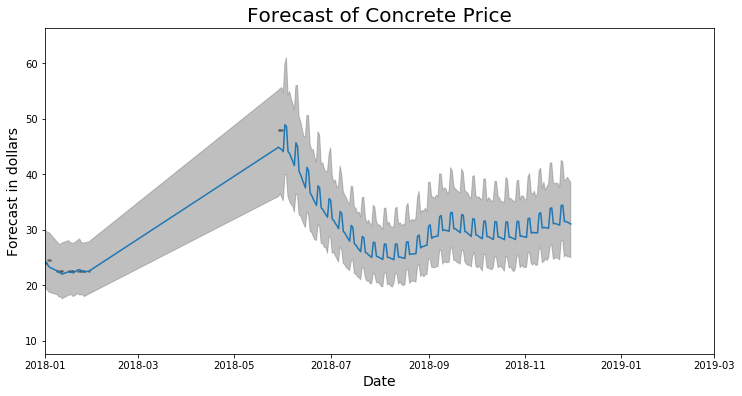

In [61]:
# plot prediction, upper/lower bounds and historic data
plt.figure(figsize=(12,6))
plt.plot(concrete_forecast_orig.ds, concrete_forecast_orig.yhat)
plt.scatter(data_concrete.ds, data_concrete.y_orig, color='k', alpha=0.5, s=3)

# plotting upper/lower bounds
plt.fill_between(concrete_forecast_orig.ds, concrete_forecast_orig.yhat_lower, concrete_forecast_orig.yhat_upper,
                 color='gray', alpha=0.5)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Forecast in dollars', fontsize=14)
plt.title('Forecast of Concrete Price', fontsize=20)
plt.xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2019-03-01'))

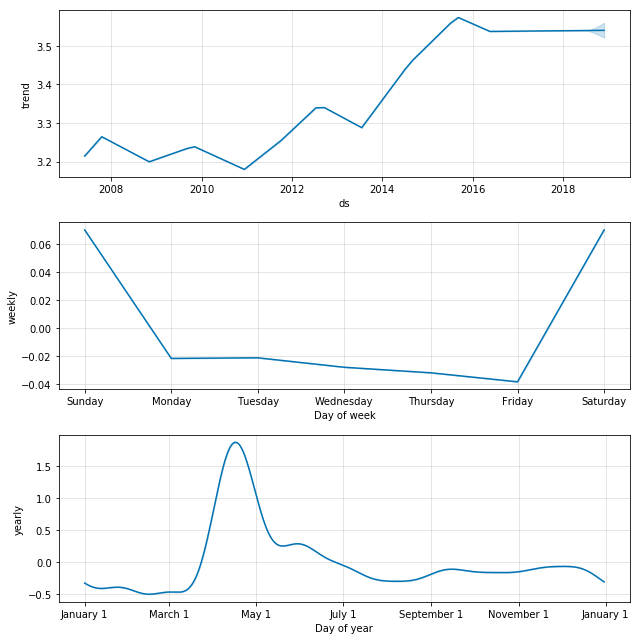

In [62]:
concrete_components_plot=concrete_model.plot_components(concrete_forecast)

In [63]:
concrete_cv = cross_validation(concrete_model, horizon='183 days')
concrete_metrics = performance_metrics(concrete_cv)
concrete_metrics.head(5)

INFO:fbprophet:Making 36 forecasts with cutoffs between 2009-02-21 12:00:00 and 2017-11-29 00:00:00


,horizon,mse,rmse,mae,mape,coverage
305,16 days,0.139801,0.373900,0.230922,0.068311,0.561181
1373,16 days,0.140024,0.374197,0.231455,0.068425,0.556962
1071,16 days,0.142733,0.377801,0.234702,0.069634,0.552743
72,16 days,0.151539,0.389280,0.240416,0.071307,0.548523
2137,16 days,0.151537,0.389277,0.240408,0.071282,0.548523


(0.2, 0.8)

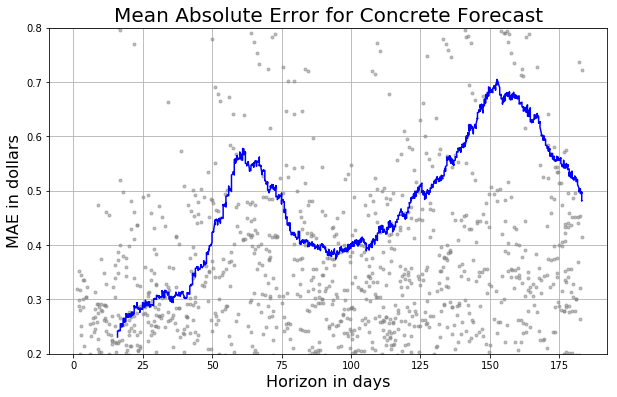

In [67]:
plot_cross_validation_metric(concrete_cv, metric='mae')
plt.xlabel('Horizon in days', fontsize=16)
plt.ylabel('MAE in dollars', fontsize=16)
plt.title('Mean Absolute Error for Concrete Forecast', fontsize=20)
plt.ylim(0.2,0.8)

#### Error for concrete forecasting is between 20 and 70 cents or less than 0.3%

In [68]:
data_plywood.columns=['ds','y']
data_plywood['y_orig']=data_plywood['y']
data_plywood['y'] = np.log(data_plywood['y'])
data_plywood = data_plywood.dropna()
data_plywood.head()

,ds,y,y_orig
105,2007-06-01,2.183238,8.875000
106,2007-06-04,2.382628,10.833333
107,2007-06-05,2.412933,11.166667
108,2007-06-06,2.277267,9.750000
109,2007-06-07,2.302585,10.000000


In [69]:
plywood_model = Prophet()
plywood_model.fit(data_plywood)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [70]:
plywood_future = plywood_model.make_future_dataframe(periods=183)
plywood_future.tail()

,ds
2851,2018-11-26
2852,2018-11-27
2853,2018-11-28
2854,2018-11-29
2855,2018-11-30


In [71]:
plywood_forecast = plywood_model.predict(plywood_future)
plywood_forecast_orig = plywood_forecast

# inverse log transform prediction
plywood_forecast_orig[['yhat', 'yhat_lower', 'yhat_upper']] = np.exp(plywood_forecast_orig[['yhat', 'yhat_lower', 'yhat_upper']])
plywood_forecast_orig[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2851,2018-11-26,12.276314,8.967027,16.497522
2852,2018-11-27,12.227499,9.075745,17.052575
2853,2018-11-28,12.143255,8.784834,16.821511
2854,2018-11-29,12.030556,8.879735,16.507237
2855,2018-11-30,11.965698,8.710215,16.035169


Text(0.5, 1.0, 'Forecast of Plywood Price')

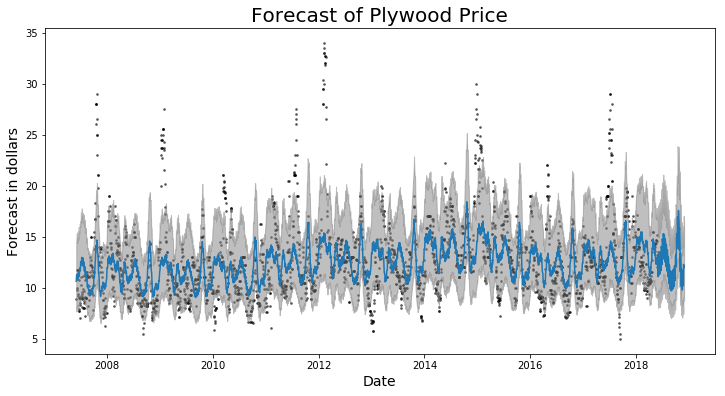

In [72]:
# plot prediction, upper/lower bounds and historic data
plt.figure(figsize=(12,6))
plt.plot(plywood_forecast_orig.ds, plywood_forecast_orig.yhat)
plt.scatter(data_plywood.ds, data_plywood.y_orig, color='k', alpha=0.5, s=3)

# plotting upper/lower bounds
plt.fill_between(plywood_forecast_orig.ds, plywood_forecast_orig.yhat_lower, plywood_forecast_orig.yhat_upper,
                 color='gray', alpha=0.5)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Forecast in dollars', fontsize=14)
plt.title('Forecast of Plywood Price', fontsize=20)

(736695.0, 737119.0)

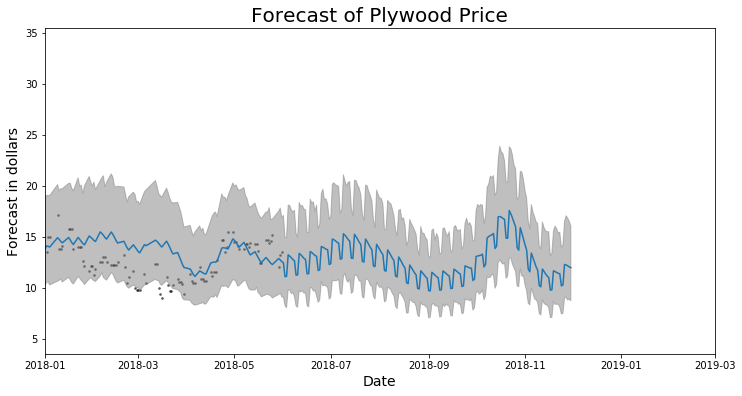

In [73]:
# plot prediction, upper/lower bounds and historic data
plt.figure(figsize=(12,6))
plt.plot(plywood_forecast_orig.ds, plywood_forecast_orig.yhat)
plt.scatter(data_plywood.ds, data_plywood.y_orig, color='k', alpha=0.5, s=3)

# plotting upper/lower bounds
plt.fill_between(plywood_forecast_orig.ds, plywood_forecast_orig.yhat_lower, plywood_forecast_orig.yhat_upper,
                 color='gray', alpha=0.5)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Forecast in dollars', fontsize=14)
plt.title('Forecast of Plywood Price', fontsize=20)
plt.xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2019-03-01'))

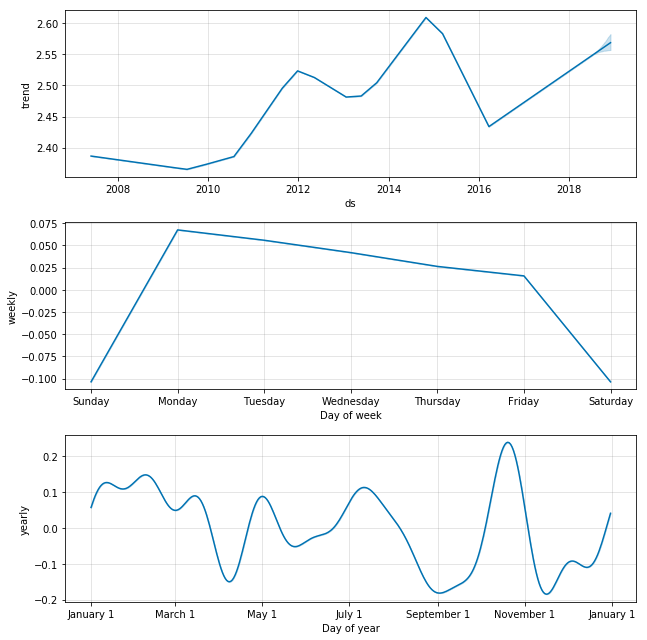

In [74]:
plywood_components_plot=plywood_model.plot_components(plywood_forecast)

In [75]:
plywood_cv = cross_validation(plywood_model, horizon='183 days')
plywood_metrics = performance_metrics(plywood_cv)
plywood_metrics.head(5)

INFO:fbprophet:Making 36 forecasts with cutoffs between 2009-02-21 12:00:00 and 2017-11-29 00:00:00


,horizon,mse,rmse,mae,mape,coverage
3297,18 days 00:00:00,0.106041,0.325639,0.254978,0.104702,0.625571
1352,18 days 00:00:00,0.106098,0.325727,0.255287,0.104814,0.625571
1840,18 days 00:00:00,0.106418,0.326218,0.255830,0.105116,0.623288
378,18 days 00:00:00,0.106670,0.326604,0.256418,0.105355,0.621005
3674,18 days 12:00:00,0.106809,0.326817,0.256798,0.105565,0.621005


In [420]:
plywood_metrics_inv_log = plywood_metrics
plywood_metrics_inv_log[['mse', 'rmse', 'mae', 'mape']]=np.exp(plywood_metrics_inv_log[['mse', 'rmse', 'mae', 'mape']])
plywood_metrics_inv_log.horizon = plywood_metrics_inv_log.horizon.astype('timedelta64[D]') #Convert timestamp in horizon to days
plywood_metrics_inv_log.head()

,horizon,mse,rmse,mae,mape,coverage
3297,18.0,1.111867,1.384915,1.290433,1.110379,0.646119
1352,18.0,1.111931,1.385038,1.290832,1.110504,0.646119
1840,18.0,1.112287,1.385717,1.291533,1.110840,0.643836
378,18.0,1.112568,1.386253,1.292292,1.111105,0.641553
3674,18.0,1.112722,1.386548,1.292784,1.111339,0.641553


(0.2, 0.4)

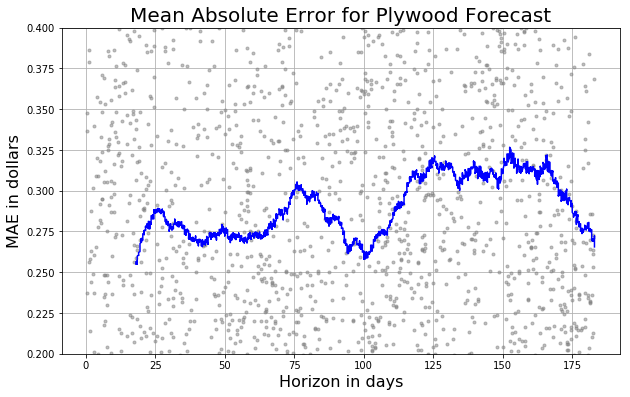

In [80]:
plot_cross_validation_metric(plywood_cv, metric='mae')
plt.xlabel('Horizon in days', fontsize=16)
plt.ylabel('MAE in dollars', fontsize=16)
plt.title('Mean Absolute Error for Plywood Forecast', fontsize=20)
plt.ylim(0.2,0.4)

#### Error for plywood is between 25 and 35 cents or less than 0.2%. Great performance.